Consider the following grid world:

<img src = "grid.png" alt = "grid" width = "400px" >

The agent may start in any cell.
It can choose between four actions: moving one cell up, moving one cell down, moving one cell
left, and moving one cell right.
When it reaches cell G, it will receive 100 points and the episode ends.
When it reaches a cell marked *, it will receive 5 points and the episode continues.
When it attempts to enter a cell marked X, it will receive -20 points and stay in the cell it came
from.
When it attempts to leave the grid, it will receive -5 points and stay where it is.
All actions entering an unmarked cell will receive -1 point.

Extend the action set by also allowing diagonal moves, such that the agent can move to its eight
neighboring cells.
Use the Value Iteration algorithm to compute the optimal value V * (s) for each cell.
Indicate the resulting optimal policy π * (s) with arrows in each cell.

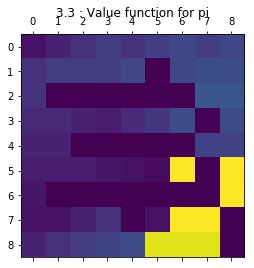

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product


#defining different actions:
up = np.array([-1,0]) #when moving up row will reduce by one and column will be intact
down = np.array([1,0])
right = np.array([0,1])
left = np.array([0,-1])

up_left = np.array([-1,-1])
up_right = np.array([-1,1])
down_left = np.array([1,-1])
down_right = np.array([1,1])

#defining grid
grid = np.array([['*', '*', '*', ' ', '*', '*', ' ', '*', '*'],
                 [' ', ' ', ' ', ' ', ' ', 'X', ' ', ' ', '*'],
                 [' ', 'X', 'X', 'X', 'X', 'X', 'X', ' ', ' '],
                 [' ', ' ', ' ', '*', '*', '*', ' ', 'X', ' '],
                 [' ', ' ', 'X', 'X', 'X', 'X', 'X', ' ', ' '],
                 [' ', ' ', ' ', ' ', ' ', ' ', ' ', 'X', ' '],
                 [' ', 'X', 'X', 'X', 'X', 'X', 'X', 'G', ' '],
                 [' ', '*', '*', '*', 'X', '*', '*', ' ', 'X'],
                 [' ', '*', '*', '*', ' ', '*', '*', ' ', 'X']])

final_state_reached = False
actions = [up,up_right,right,down_right,down,down_left,left,up_left]

def show_fig(matrix, name):
    """ little helper function to show matrix as an image"""
    plt.matshow(matrix)
    plt.title(name)
    plt.show()

def make_move(state, action):
    #to calculate next state with reward
    if grid[state[0], state[1]] == 'G':
        # terminate and return reward 0 as it is terminal state
        return state, 0.

    new_state = state + action
    # check if moving out from grid
    if (not new_state[0] in range(0, 9) or not new_state[1] in range(0, 9)):
        return state, -5.
    if grid[new_state[0],new_state[1]] == ' ':
        state = new_state
        return state, -1.
    if grid[new_state[0],new_state[1]] == 'X':
        return state, -20.
    if grid[new_state[0],new_state[1]] == '*':
        state = new_state
        return state, 5.
    if grid[new_state[0],new_state[1]] == 'G':
        state = new_state
        final_state = True  #will be reaching final stage with reward as 100
        return state, 100.
    

def maxValAction(value_function,x,y):
    
    max_ = -100000000000
    maxAction = [actions[0]]
    for action in actions:
        new_state = action[0]+x, action[1] + y
        if not new_state[0] in range(0, 9) or not new_state[1] in range(0, 9) or val_function[new_state[0],new_state[1]]==0:
            continue
                                                                                              
        if max_ < val_function[new_state[0],new_state[1]]:
            max_ = val_function[new_state[0],new_state[1]]
            maxAction = [action]
        elif max_ == val_function[new_state[0],new_state[1]]:
            maxAction.append(action)
            
    return maxAction
        
        

# Assignement 3.3

#initial value of value funtion
val_function = np.zeros((9,9))
tolerance = 0.01 #for stopping the loop; no value given in question so taking 0.01
val_function_old = np.ones((9,9))
while np.abs(val_function - val_function_old).max() > tolerance:
    # for each state
    for x, y in product(range(9), repeat=2):
        val_function_old = val_function.copy()
        if grid[x,y] == 'X':
#             we will never reach x spots , so values dont update
            continue
        next_states = [make_move(np.array([x, y]), act) for act in actions]
        a = np.argmax([reward + 0.9 * val_function[state[0], state[1]] for state, reward in next_states])
        next_state,reward = next_states[a]
        V = reward + 0.9 * val_function[next_state[0], next_state[1]]
        val_function[x][y] = V
        
# print(val_function)
show_fig(val_function, "3.3 : Value function for pi")

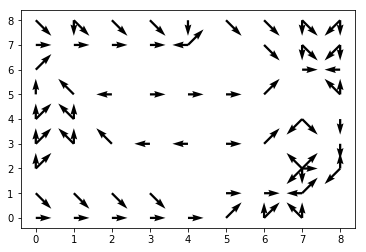

In [3]:
x_pos = []
y_pos = []
x_direct = []
y_direct = []

for x, y in product(range(9), repeat=2):
    if grid[x,y] == 'X':
        continue
    actions_ = maxValAction(val_function,x,y)
    for action in actions_:
        x_pos.append(y)
        y_pos.append(8-x)
        x_direct.append(action[1])
        y_direct.append(-1*action[0])

        
plt.quiver(x_pos,y_pos,x_direct,y_direct)

plt.show()